# Imports

In [32]:
import os

from sudokusolver.aimodels import solver ,solver_test
from sudokusolver.detectboard.processimage import extract_sudoku_squares , extract_board, create_board_array
from sudokusolver.detectboard.loadimage import get_all_img_files, read_imgs_from_files
from sudokusolver.classifydigits.imageviz import display_img , plot_comparison
from sudokusolver.solvedboard.createsolvedigits import create_solved_board

from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import cv2

from datetime import datetime
from pathlib import Path
from typing import List, Tuple, Union
import tensorflow as tf



# Load Models

In [33]:
digit_classifier = tf.keras.models.load_model("digit_classifier_model/digit_classifier_vgg16.hdf5")
cnn_model_solve = tf.keras.models.load_model("sudoku_solver_models/best_sudoku_solver_test_training_full_set_puzzles_629.h5")

# Load Images

In [34]:
BOARD_RESIZE_DIM = 2520

fill_image_files = get_all_img_files('images/solution_digits')
fill_image_dict = dict(zip(range(1,10),read_imgs_from_files(fill_image_files)))

game_board_files = get_all_img_files('images/blockbuster_book_of_sudoku_images')
game_board_imgs = read_imgs_from_files(game_board_files)

# Select Random Board to Sample
sample_game_index = np.random.randint(0,len(game_board_imgs))
sample_game = game_board_imgs[sample_game_index]




# Display Unsolved Board Picture

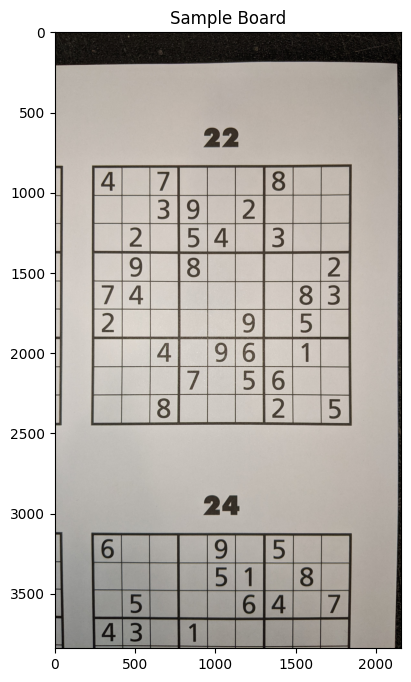

In [35]:
display_img(sample_game, title = 'Sample Board', fig_size = (10,8))

# Show Detected Board

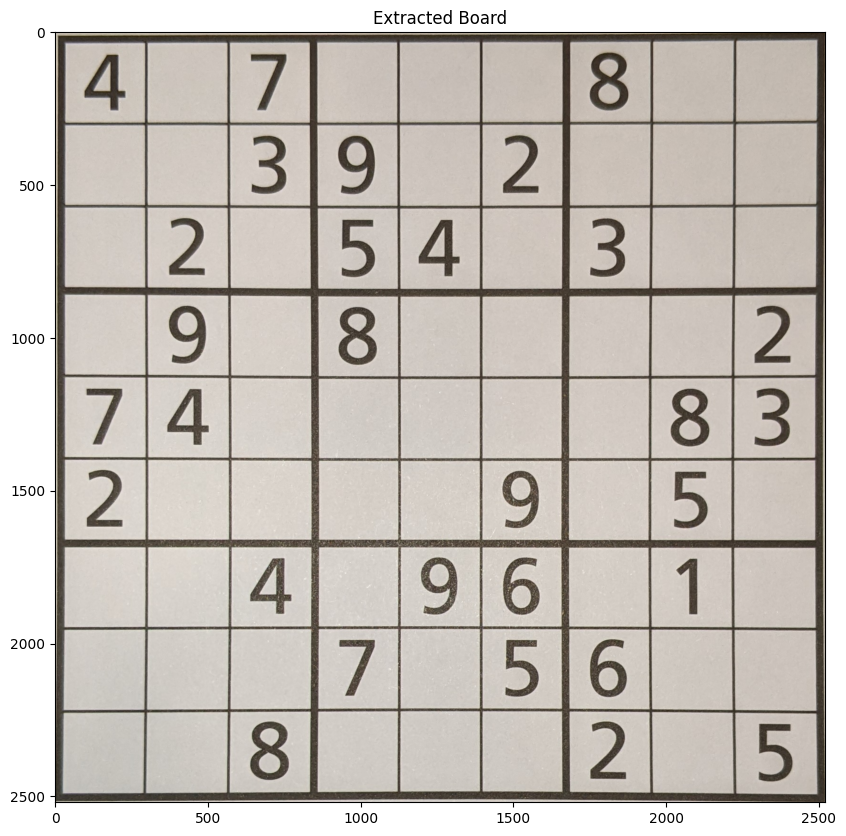

In [36]:
unsolved_board_img = extract_board(sample_game )
display_img(unsolved_board_img, title = 'Extracted Board' , fig_size = (12,10))

# Create Unsolved Board Array

In [37]:
square_dict = extract_sudoku_squares(unsolved_board_img , BOARD_RESIZE_DIM)
squares = list(square_dict.values())
unsolved_board_array = create_board_array(squares,classifier_model=digit_classifier)
unsolved_board_array

array([[4, 0, 7, 0, 0, 0, 8, 0, 0],
       [0, 0, 3, 9, 0, 2, 0, 0, 0],
       [0, 2, 0, 5, 4, 0, 3, 0, 0],
       [0, 9, 0, 8, 0, 0, 0, 0, 2],
       [7, 4, 0, 0, 0, 0, 0, 8, 3],
       [2, 0, 0, 0, 0, 9, 0, 5, 0],
       [0, 0, 4, 0, 9, 6, 0, 1, 0],
       [0, 0, 0, 7, 0, 5, 6, 0, 0],
       [0, 0, 8, 0, 0, 0, 2, 0, 5]], dtype=int64)

# Use CNN to Solve Puzzle

In [38]:
solved_board_array = solver(unsolved_board_array, cnn_model_solve)
solved_board_array

Fixed Solution Space
Fixed Solution Space
Fixed Solution Space
Valid Solution


array([[4, 5, 7, 1, 6, 3, 8, 2, 9],
       [8, 6, 3, 9, 7, 2, 5, 4, 1],
       [1, 2, 9, 5, 4, 8, 3, 7, 6],
       [3, 9, 1, 8, 5, 7, 4, 6, 2],
       [7, 4, 5, 6, 2, 1, 9, 8, 3],
       [2, 8, 6, 4, 3, 9, 1, 5, 7],
       [5, 3, 4, 2, 9, 6, 7, 1, 8],
       [9, 1, 2, 7, 8, 5, 6, 3, 4],
       [6, 7, 8, 3, 1, 4, 2, 9, 5]], dtype=int64)

# Create Solved Board Image

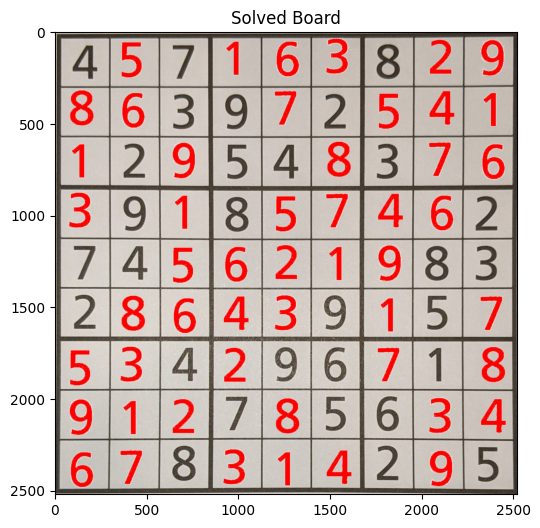

In [39]:
solved_board_img = create_solved_board(unsolved_board_img,unsolved_board_array, solved_board_array, square_dict, fill_image_dict)
display_img(solved_board_img, title = 'Solved Board')

# Compare Unsolved and Solved Puzzle

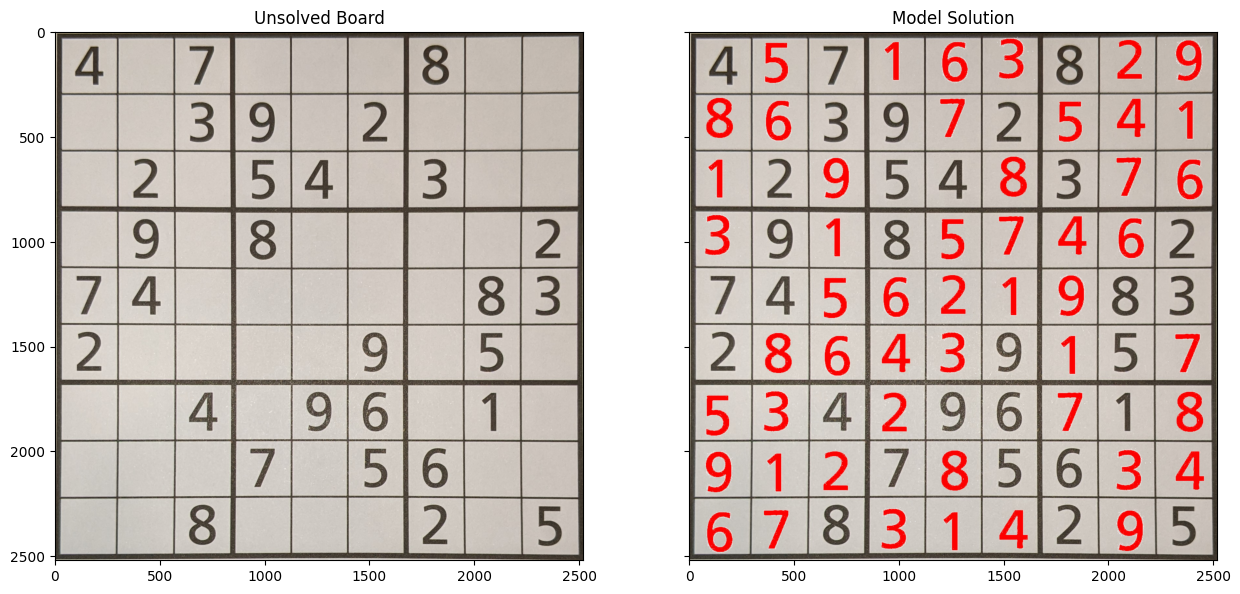

In [40]:
plot_comparison(unsolved_board_img, solved_board_img, title_0 = 'Unsolved Board' , title_1 = 'Model Solution', fig_size = (15,8))